# Q1

Faites les étapes suivantes:

* lire les données à partir de l'url [donnes_demo](https://raw.githubusercontent.com/nmeraihi/data/master/1000_HF.csv) (3 pts)
* réer une fonction qui calcule l'âge de chaque client en date du premier jours du mois courant dans une nouvelle variable d'aun 
* Créer un graphique du type _Bar Chart_ sur le âge des clients. Par ce graphique, on verra facilement le nombre d'assurés par catégorie d'âge (3 pts)  

Votre graphique contient les éléments suivants:
    * Un titre (1 pts)
    * Une étiquette de l'axe des $x$ (âge des assurés) (1 pts)
    * Une étiquette de l'axe des $y$ (nombre d'assurés) (1 pts)

In [60]:
a<-read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/1000_HF.csv")

In [61]:
head(a)

first_name,last_name,birth_date,address,job,province,sex,Id
Anaïs,Chevallier,1944-08-06,87930 Justin Inlet,Chargé de recherche en acoustique musicale,New Brunswick,F,201601
Christine,Leveque,1951-01-02,1792 Lauren Glens,Secrétaire juridique,New Brunswick,F,201251
Maryse,Chartier,1988-01-24,71833 Emily Gateway,Développeur humanitaire,New Brunswick,F,201720
Avide,Damico,1967-03-31,5510 Christine Land,Conseiller en séjours,Ontario,F,206972
Anaïs,Laroche,1975-02-20,1123 Tracy Landing Suite 232,Technicien,Alberta,F,202657
Pénélope,Bernard,1952-06-01,0232 Mccullough Divide,Chercheur en biologie,Yukon Territory,F,202092


In [62]:
library(lubridate)
dt <- Sys.Date()
day(dt) <- 01
a$age<-round(as.numeric(dt-as.Date(a$birth_date))/365.25,0)

In [8]:
library(ggplot2)

In [57]:
lectu_graph<-function(data, variable, ...){    
    ret <- ggplot(data, aes_string(x=variable), ...) + geom_bar()
    return(ret)
}

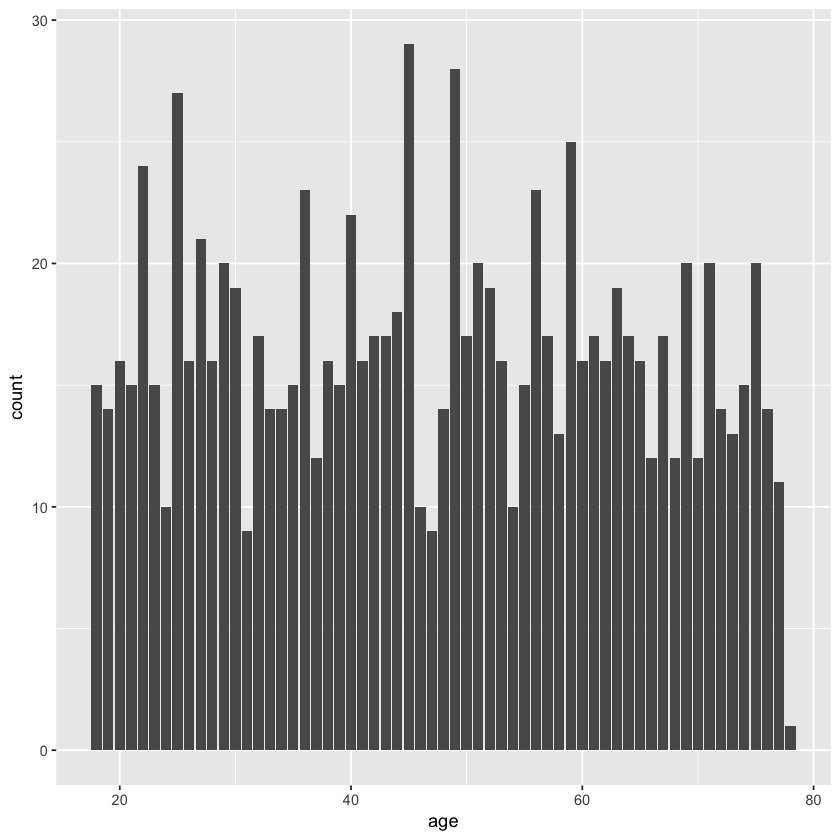

In [59]:
lectu_graph(a, "age")

# Q2

À partir de la base de données [suivante](https://raw.githubusercontent.com/nmeraihi/data/master/pmt_details.csv), reproduisez le graphique suivant*: ![ggplot bars](https://s3.amazonaws.com/www.nour.me/public_images/graph_exercice_13_2.png)

Ignorez la variable `freq_pmt`. Considérez que les paiements sont reçus une fois par année et c'est au même mois que le mois de la date d'expiration.
*chaque détail compte (titre, xlab, ordre des mois ...etc)


In [ ]:
# install.packages("httr")

In [ ]:
library(httr)

In [63]:
url<-"https://raw.githubusercontent.com/nmeraihi/data/master/pmt_details.csv"

In [ ]:
http_error(url) #veerifaction que ma variable url est bien un url sans erreur

Donc on peut faire un `if` pour valider le url

In [ ]:
if (http_error(url)==F){
   pmt_det<-read.csv(url) 
}

In [ ]:
head(pmt_det)

ou le faire comme d'habitude;

In [64]:
pmt_det<-read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/pmt_details.csv")
head(pmt_det)

numeropol,cout_prime,credit_card_number,credit_card_provider,credit_card_expire,freq_pmt
1,1060.28,4.427476e+15,Voyager,04/23,12
5,1200.89,5.303389e+15,JCB 16 digit,08/26,1
13,940.54,3.528569e+15,Maestro,08/22,12
16,860.75,6.011570e+15,VISA 13 digit,03/23,1
22,790.17,5.262495e+15,Maestro,08/20,1
28,940.16,4.583364e+15,Discover,03/20,1


l'avantage de vérifier l'url et de valider le tout dans une fonction avant l'exécution:

In [65]:
require("lubridate")

In [67]:
require("zoo")

In [ ]:
# detach("package:zoo", unload=TRUE) # juste pour unload le package afin de vous    
# montrer l'utilité de ce package dans la ligne qui suit

Puisque le format de la date d'éxpiration de la carte de crédit a un format date inhabituel, on utilisera le pckage `zoo` afin de pouvoir extraire le mois de cette date.  
Remarquez qu'on aurait pu utiliser les fonction `substr` pour extraire le mois seulement, toutefois il faut retransformer le charctère extrait en `int64`

In [68]:
mois<-as.yearmon(pmt_det$credit_card_expire, "%m/%y") 

Maintenant on peut finalement utiliser la fonction `month` pour avoir le mois;

In [69]:
month.abb[head(as.numeric(format(mois, "%m")))]

[1] "Apr" "Aug" "Aug" "Mar" "Aug" "Mar"

insérons le tout dans une nouvelle variable (colonne)

In [70]:
pmt_det$mois_pmt<-month.abb[as.numeric(format(mois, "%m"))]

Suite à la question de un de vos collègues, voici la fonction qui permet d'ordonner `sort`

In [71]:
sort(factor(head(pmt_det$mois_pmt), levels = month.abb))

[1] Mar Mar Apr Aug Aug Aug
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [72]:
head(pmt_det$mois_pmt)

[1] "Apr" "Aug" "Aug" "Mar" "Aug" "Mar"

Jetons un coup d'oeil à notre nouveau df

In [73]:
head(pmt_det)

numeropol,cout_prime,credit_card_number,credit_card_provider,credit_card_expire,freq_pmt,mois_pmt
1,1060.28,4.427476e+15,Voyager,04/23,12,Apr
5,1200.89,5.303389e+15,JCB 16 digit,08/26,1,Aug
13,940.54,3.528569e+15,Maestro,08/22,12,Aug
16,860.75,6.011570e+15,VISA 13 digit,03/23,1,Mar
22,790.17,5.262495e+15,Maestro,08/20,1,Aug
28,940.16,4.583364e+15,Discover,03/20,1,Mar


Et maintenant utilisons `ggplot` pour tracer le graph demandé;

In [74]:
library(ggplot2)

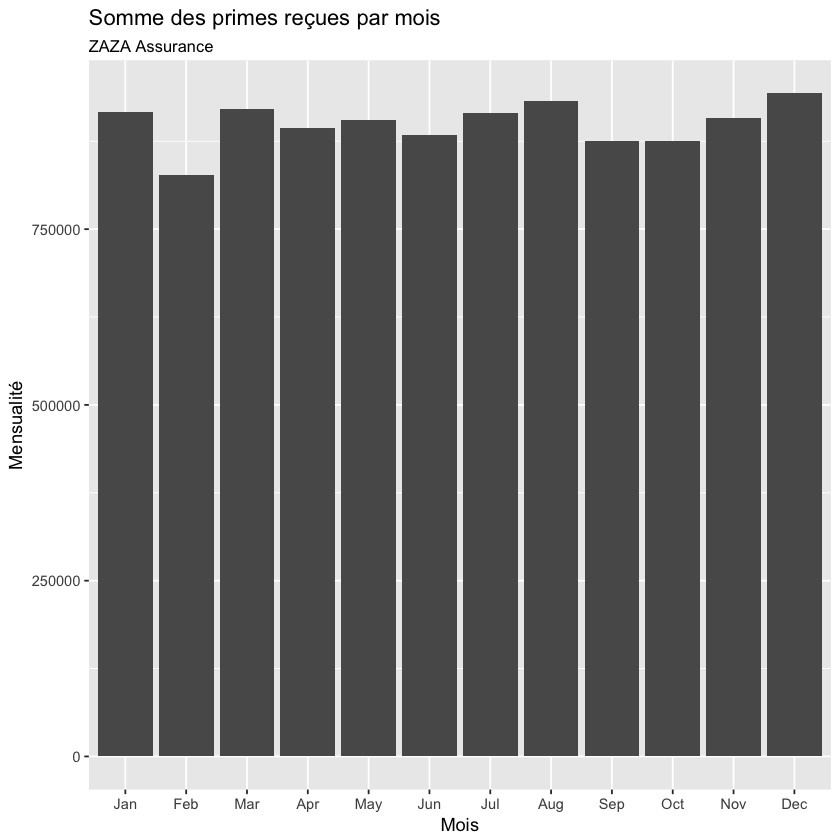

In [75]:
ggplot(data = pmt_det,
  aes(sort(factor(pmt_det$mois_pmt, levels = month.abb)), cout_prime)) +  
  stat_summary(fun.y = sum,
    geom = "bar", )+
    xlab("Mois")+
    ylab("Mensualité")+
    labs(title = "Somme des primes reçues par mois", subtitle="ZAZA Assurance")

# Q3

## a)
Faites un graphique qui permet de voir l'évolution des coûts de sinistre dans le temps. Sur l'axe des $x$, on devrait voir les mois et l'année (1999-01, 1999-02 ...). À des fins de l'exercice, imaginez que s'il y'a un sinistre, il se passe toujours la même date que le `debut_pol` dans les données [suivantes](https://raw.githubusercontent.com/nmeraihi/data/master/police_assurance.csv). Vous pouvez utiliser la fonction `aggregate` pour regrouper les sinistres par mois.

In [78]:
donnes_demo<-read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/donnes_demo.csv")
head(donnes_demo)

name,province,company,langue,date_naissance,agee,age_permis,numeropol
Shane Robinson,Nova Scotia,May Ltd,fr,1944-10-20,72,24,1
Courtney Nguyen,Saskatchewan,"Foley, Moore and Mitchell",en,1985-12-09,31,24,5
Lori Washington,Yukon Territory,Robinson-Reyes,fr,1970-01-27,47,28,13
Sarah Castillo,Alberta,"Wood, Brady and English",fr,2000-08-23,16,16,16
Jeffrey Garcia,Nunavut,Berger-Thompson,en,1969-10-25,47,20,22
Colleen Coleman,Saskatchewan,Simmons-Smith,en,1984-10-16,32,23,28


In [81]:
tail(donnes_demo)

,name,province,company,langue,date_naissance,agee,age_permis,numeropol
15,Heather Maldonado,Nunavut,Walker Group,en,1999-02-23,18,18,69
16,Christina Howard,Nova Scotia,Pena and Sons,en,1969-05-22,48,22,72
17,Karen Nguyen,Northwest Territories,Price PLC,fr,1972-12-20,44,22,78
18,Connie Alvarado,Manitoba,Jensen-Cooper,en,1974-10-18,42,34,83
19,Heidi Freeman,Northwest Territories,"Singh, Esparza and Santos",en,1951-06-07,65,18,84
20,Morgan Buchanan,Northwest Territories,Rollins Inc,fr,1971-07-31,45,31,91


In [79]:
police_assurance<-read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/police_assurance.csv")

In [80]:
head(police_assurance)

numeropol,debut_pol,fin_pol,cout1,cout2,cout3,cout4,cout5,cout6,cout7,nbsin
1,1999-11-10,2000-10-16,NA,NA,NA,NA,NA,NA,NA,0
1,2000-10-17,2000-11-09,NA,NA,NA,NA,NA,NA,NA,0
1,2000-11-10,2001-11-09,243.8571,NA,NA,NA,NA,NA,NA,1
5,1996-01-03,1996-03-27,NA,NA,NA,NA,NA,NA,NA,0
5,1996-03-28,1997-01-02,NA,NA,NA,NA,NA,NA,NA,0
5,1997-01-03,1998-01-02,NA,NA,NA,NA,NA,NA,NA,0


Creéons une nouvelle variable `ann_mois_sinistre` où nous conservons seulement le mois et l'année de la date `debut_pol	` 

In [82]:
police_assurance$ann_mois_sinistre<-format(as.Date(police_assurance$debut_pol), "%Y-%m")

Ensuite nous faisons une somme sur toutes les variables (cout1@cout7). Il est important d'ajouter l'argument `na.rm=T` afin de prendre en considération les `na`

In [83]:
police_assurance$somme_couts<-apply(police_assurance[,4:10],1 ,sum, na.rm=TRUE)

Ensuite nous faisons un sommaire (somme) de tous les coûts totaux groupé par mois **ET** année

In [84]:
df_q6<-aggregate(police_assurance$somme_couts,
                 by=list(ann_mois_sinistre=police_assurance$ann_mois_sinistre), FUN=sum)

In [85]:
head(df_q6)

ann_mois_sinistre,x
1995-01,117.4658
1995-02,67543.4286
1995-03,4860.8261
1995-04,5738.0932
1995-05,5449.1056
1995-06,13850.9193


On voit que maintenant nos données vont du 1995-01 au 2004-05

In [86]:
max(police_assurance$ann_mois_sinistre)

[1] "2004-05"

In [87]:
library(scales)

In [ ]:
# detach("package:scales", unload=TRUE)

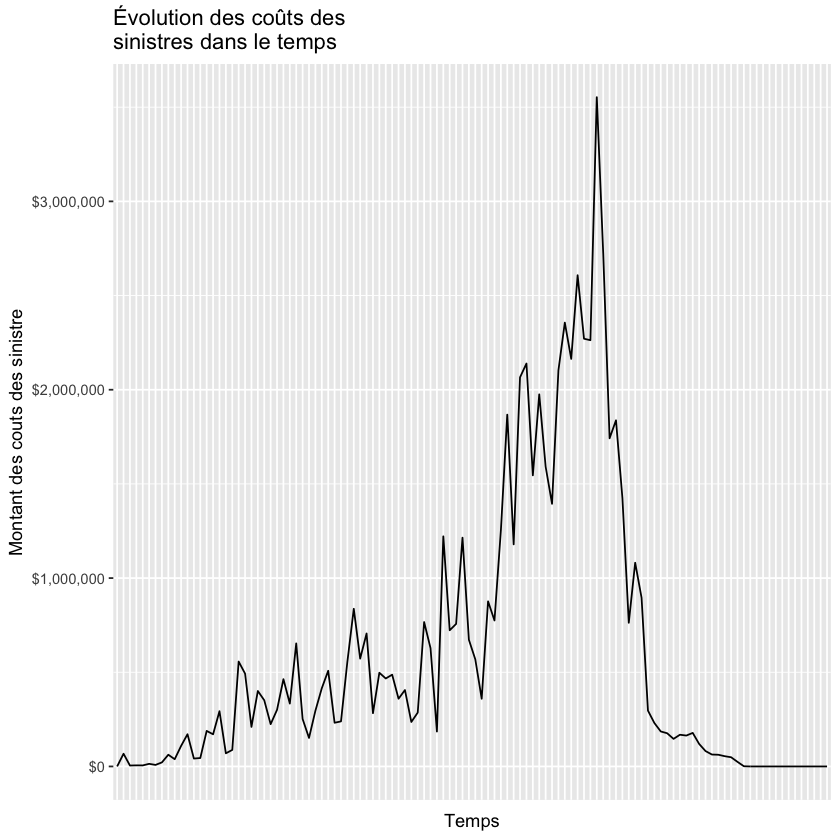

In [88]:
ggplot(data=df_q6, aes(x=ann_mois_sinistre, y=x, group=1)) +
    geom_line() +
    xlab("Temps") + ylab("Montant des couts des sinistre") +
    scale_y_continuous(labels = dollar)+ # c'est là que sert le package scale
    ggtitle("Évolution des coûts des \nsinistres dans le temps")+
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank())

## b)
Faites maintenant le même exercice en regroupant les coûts de sinistres par année. Vous devriez avoir le graphique suivant:

In [89]:
police_assurance$sinistre_ann<-format(as.Date(police_assurance$debut_pol), "%Y")

In [90]:
df_q6_b<-aggregate(police_assurance$somme_couts, by=list(sinistre_ann=police_assurance$sinistre_ann), FUN=sum)

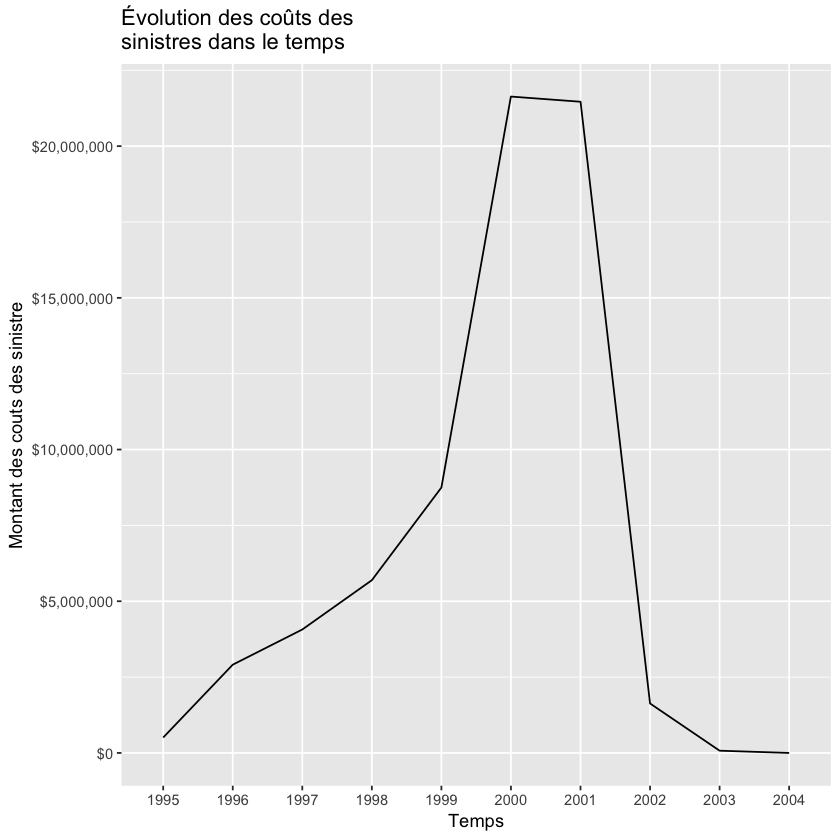

In [91]:
ggplot(data=df_q6_b, aes(x=sinistre_ann, y=x, group=1)) +
    geom_line() +
    xlab("Temps") + ylab("Montant des couts des sinistre") +
    scale_y_continuous(labels = dollar)+
    ggtitle("Évolution des coûts des \nsinistres dans le temps")

# Q4
## a) 
Faites le même exercice que la question 3b), mais cette fois, séparez les coûts en deux catégories;
* les coûts de sinistres annuels pour les francophones
* les coûts de sinistres annuels pour les anglophones

Faite un graphique qui contient deux lignes, une première qui représente les coûts de sinistre sur le temps pour les francophones, et l'autre ligne pour les anglophones.

In [92]:
df_q4<-aggregate(police_assurance$somme_couts, by=list(sinistre_ann=police_assurance$sinistre_ann, numeropol=police_assurance$numeropol), FUN=sum)

In [93]:
head(df_q4)

sinistre_ann,numeropol,x
1999,1,0.0000
2000,1,243.8571
1996,5,0.0000
1997,5,0.0000
1998,5,0.0000
1995,13,0.0000


In [94]:
head(police_assurance)

numeropol,debut_pol,fin_pol,cout1,cout2,cout3,cout4,cout5,cout6,cout7,nbsin,ann_mois_sinistre,somme_couts,sinistre_ann
1,1999-11-10,2000-10-16,NA,NA,NA,NA,NA,NA,NA,0,1999-11,0.0000,1999
1,2000-10-17,2000-11-09,NA,NA,NA,NA,NA,NA,NA,0,2000-10,0.0000,2000
1,2000-11-10,2001-11-09,243.8571,NA,NA,NA,NA,NA,NA,1,2000-11,243.8571,2000
5,1996-01-03,1996-03-27,NA,NA,NA,NA,NA,NA,NA,0,1996-01,0.0000,1996
5,1996-03-28,1997-01-02,NA,NA,NA,NA,NA,NA,NA,0,1996-03,0.0000,1996
5,1997-01-03,1998-01-02,NA,NA,NA,NA,NA,NA,NA,0,1997-01,0.0000,1997


In [95]:
head(donnes_demo)

name,province,company,langue,date_naissance,agee,age_permis,numeropol
Shane Robinson,Nova Scotia,May Ltd,fr,1944-10-20,72,24,1
Courtney Nguyen,Saskatchewan,"Foley, Moore and Mitchell",en,1985-12-09,31,24,5
Lori Washington,Yukon Territory,Robinson-Reyes,fr,1970-01-27,47,28,13
Sarah Castillo,Alberta,"Wood, Brady and English",fr,2000-08-23,16,16,16
Jeffrey Garcia,Nunavut,Berger-Thompson,en,1969-10-25,47,20,22
Colleen Coleman,Saskatchewan,Simmons-Smith,en,1984-10-16,32,23,28


In [97]:
library(dplyr)

In [98]:
df_join<-left_join(df_q4,donnes_demo[, c("numeropol","langue")],by = "numeropol")
head(df_join)

sinistre_ann,numeropol,x,langue
1999,1,0.0000,fr
2000,1,243.8571,fr
1996,5,0.0000,en
1997,5,0.0000,en
1998,5,0.0000,en
1995,13,0.0000,fr


Ensuite nous regroupons le tout par année de sinistre **et** langue parlée en faisant une somme sur la variable `x` de l'ancien data frame df_join

In [99]:
df_join_sum<-aggregate(df_join$x, 
                 by=list(sinistre_ann=df_join$sinistre_ann, 
                         langue=df_join$langue), FUN=sum)

Remarquez la nouvelle variable `x` avec le total par année et par langue

In [100]:
df_join_sum

sinistre_ann,langue,x
1995,en,4384.31056
1996,en,6205.98758
1997,en,611.27950
1998,en,0.00000
1999,en,44245.03106
2000,en,825.40373
2001,en,25096.28571
2002,en,416.44720
2003,en,1151.08696
1995,fr,60.50932


Maintenant nous pouvons faire notre graphique ou notyre variable d'intérêt `x` est assignée aux deux groupes de langue `group=langue`. Nous distinguons ces deux groupes par couleur `colour=langue`

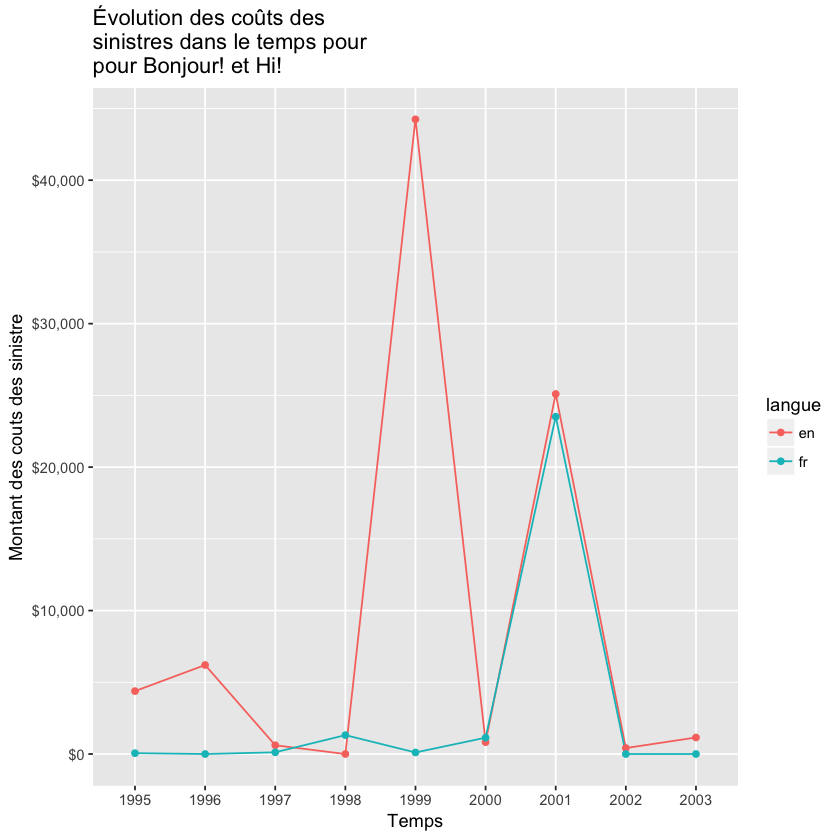

In [101]:
ggplot(data=df_join_sum, aes(x=sinistre_ann, y=x, group=langue, colour=langue)) +
    geom_line() +
    geom_point()+    xlab("Temps") + ylab("Montant des couts des sinistre") +
    ggtitle("Évolution des coûts des \nsinistres dans le temps pour \npour Bonjour! et Hi!")+
    scale_y_continuous(labels = dollar)

On peut réduire le nombre de `0` sur notre axe des $y$

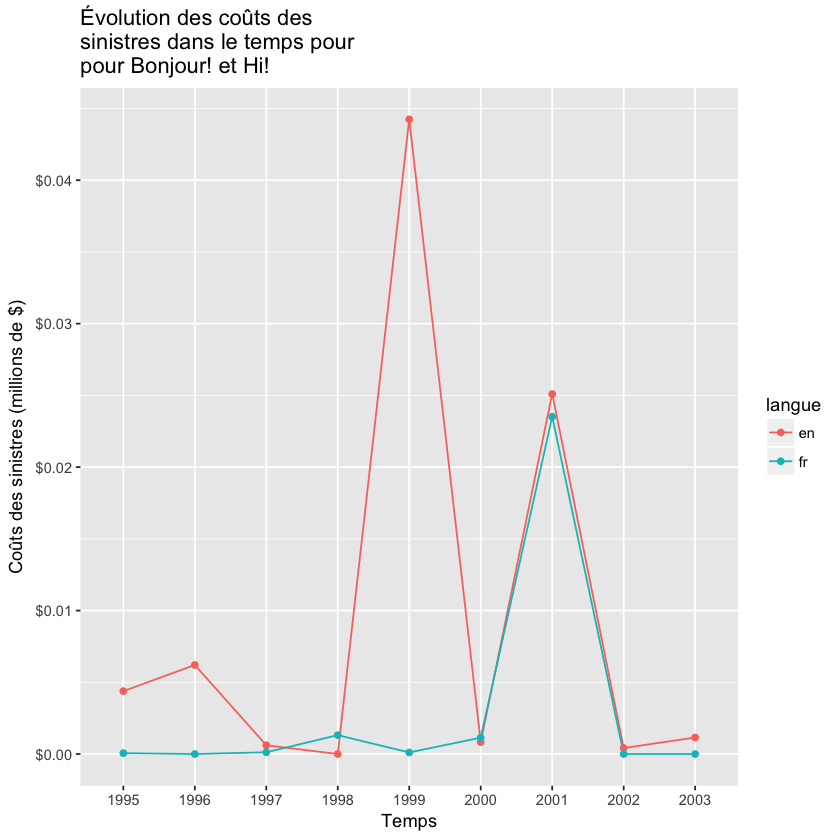

In [102]:
million<-1000000

ggplot(data=df_join_sum, aes(x=sinistre_ann, y=x/million, group=langue, colour=langue)) +
    geom_line() +
    geom_point()+    xlab("Temps") + ylab("Coûts des sinistres (millions de $)") +
    ggtitle("Évolution des coûts des \nsinistres dans le temps pour \npour Bonjour! et Hi!")+
    scale_y_continuous(labels = dollar)

# Q5
On vous dit que la compagnie Discover, émettrice de cartes de crédit, a été achetée par le groupe Ironman. Faites la mise à jour de ces informations dans votre base de données. Mais n'oubliez pas de créer un backup de votre ancienne BD sous le format suivant `yyyy_mm_dd_HH_MM_SS.csv`(année, mois, jour, heure, minute et seconde).

In [107]:
pmt_det<-read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/pmt_details.csv")
head(pmt_det)

numeropol,cout_prime,credit_card_number,credit_card_provider,credit_card_expire,freq_pmt
1,1060.28,4.427476e+15,Voyager,04/23,12
5,1200.89,5.303389e+15,JCB 16 digit,08/26,1
13,940.54,3.528569e+15,Maestro,08/22,12
16,860.75,6.011570e+15,VISA 13 digit,03/23,1
22,790.17,5.262495e+15,Maestro,08/20,1
28,940.16,4.583364e+15,Discover,03/20,1


In [108]:
date_heure<-Sys.time()
date_heure

[1] "2018-04-01 17:15:19 EDT"

In [109]:
date_heure<-gsub(":", "_", date_heure)
date_heure<-gsub(" ", "_", date_heure)
date_heure<-gsub("-", "_", date_heure)

In [110]:
date_heure

[1] "2018_04_01_17_15_19"

In [111]:
nom_fichier<-paste("", date_heure, ".csv", sep = "")
nom_fichier

[1] "2018_04_01_17_15_19.csv"

In [112]:
write.csv(pmt_det, nom_fichier)

In [113]:
pmt_det$credit_card_provider <- replace(as.character(pmt_det$credit_card_provider), 
                                        pmt_det$credit_card_provider == "Discover", "Ironman")

In [114]:
head(pmt_det)

numeropol,cout_prime,credit_card_number,credit_card_provider,credit_card_expire,freq_pmt
1,1060.28,4.427476e+15,Voyager,04/23,12
5,1200.89,5.303389e+15,JCB 16 digit,08/26,1
13,940.54,3.528569e+15,Maestro,08/22,12
16,860.75,6.011570e+15,VISA 13 digit,03/23,1
22,790.17,5.262495e+15,Maestro,08/20,1
28,940.16,4.583364e+15,Ironman,03/20,1


On vérifie qu'on a bien une valeur `Ironman`

In [115]:
head(pmt_det[which(pmt_det$credit_card_provider=="Ironman"),])

,numeropol,cout_prime,credit_card_number,credit_card_provider,credit_card_expire,freq_pmt
6,28,940.16,4.583364e+15,Ironman,03/20,1
15,69,720.57,4.530801e+15,Ironman,05/19,1
26,113,720.50,4.507907e+15,Ironman,03/21,1
32,126,960.24,5.127974e+15,Ironman,05/20,1
34,136,980.10,4.635091e+15,Ironman,04/20,1
43,172,930.86,5.408687e+15,Ironman,03/24,1


et que la valeur `Discover` n'éxiste plus

In [116]:
pmt_det[which(pmt_det$credit_card_provider=="Discover"),]

numeropol,cout_prime,credit_card_number,credit_card_provider,credit_card_expire,freq_pmt


# Q6
## a)
Faites un graphique du prix du bitcoin sur la période allant du 2016-12-04 au 2017-12-04. Vous pouvez lire ces données [ici](https://raw.githubusercontent.com/nmeraihi/data/master/bitcoin_price.csv).

In [120]:
bitCoin<-read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/bitcoin_price.csv")
head(bitCoin)

Date,Close.Price
2016-12-04 0:00,766.46
2016-12-05 0:00,750.71
2016-12-06 0:00,758.81
2016-12-07 0:00,763.90
2016-12-08 0:00,766.75
2016-12-09 0:00,770.41


In [121]:
tail(bitCoin)

,Date,Close.Price
361,2017-11-29 0:00,9816.35
362,2017-11-30 0:00,9916.54
363,2017-12-01 0:00,10859.56
364,2017-12-02 0:00,10895.01
365,2017-12-03 0:00,11180.89
366,2017-12-04 14:52,11420.50


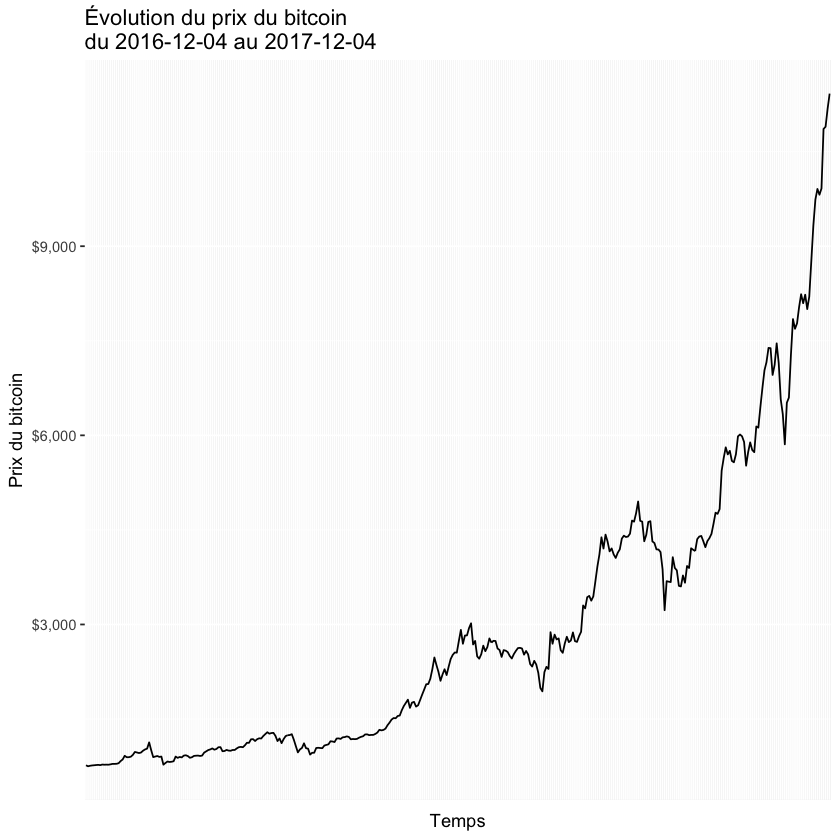

In [122]:
ggplot(data=bitCoin, aes(x=Date, y=Close.Price, group=1)) +
    geom_line() +
    xlab("Temps") + ylab("Prix du bitcoin") +
    scale_y_continuous(labels = dollar)+
    ggtitle("Évolution du prix du bitcoin \ndu 2016-12-04 au 2017-12-04")+
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank())

## b)
Sauvegardez le graphique dans un fichier `.png` sous le format de 5" de largeur et 3" de hauteur dans le répertoire courant (_working directory_)

In [123]:
ggsave("bitcoinProce.png",width = 5, height = 3)

## c)
Calculer le rendement quotidien que vous avez fait depuis l'achat de votre bitcoin. On se rappelle que le rendement quotidien se calcule comme suit;

$$r={\frac {V_{f}-V_{i}}{V_{i}}}$$

In [124]:
head(bitCoin)

Date,Close.Price
2016-12-04 0:00,766.46
2016-12-05 0:00,750.71
2016-12-06 0:00,758.81
2016-12-07 0:00,763.90
2016-12-08 0:00,766.75
2016-12-09 0:00,770.41


In [125]:
head(diff(bitCoin$Close.Price)/bitCoin$Close.Price[-length(bitCoin$Close.Price)])

[1] -0.020549018  0.010789786  0.006707872  0.003730855  0.004773394
[6]  0.003634428

Remarquez que si l'on voulait insérer ce qu'on vient de faire `diff(...)` dans une nouvelle colonne de notre df `bitCoin`, ça n'aurait pas pu fonctionner car nous avons calculer 365 valleurs alors que notre df possède 366 observations. Puisqu'au temps $t=0$, nous n'avons aucun rendement encore.

Alors il faut mettre le rendemnet au tempos $t=0$ à `null`

In [126]:
bitCoin$rate_return<-c(NA, diff(bitCoin$Close.Price)/bitCoin$Close.Price[-length(bitCoin$Close.Price)])

Le package Quantmod contient une fonction _built in_ qui calcul le rendement. Cette fonction est appelée `Delt`

In [128]:
require(quantmod)

In [129]:
bitCoin$rate_return<-Delt(bitCoin$Close.Price)
head(bitCoin)

Date,Close.Price,rate_return
2016-12-04 0:00,766.46,NA
2016-12-05 0:00,750.71,-0.020549018
2016-12-06 0:00,758.81,0.010789786
2016-12-07 0:00,763.90,0.006707872
2016-12-08 0:00,766.75,0.003730855
2016-12-09 0:00,770.41,0.004773394


Remarquez qu'elle insère un rendement=na au temps $t=0$

In [130]:
bitCoin_2<-bitCoin[-1,] # on se débarasse de la première observation
head(bitCoin_2)

,Date,Close.Price,rate_return
2,2016-12-05 0:00,750.71,-0.020549018
3,2016-12-06 0:00,758.81,0.010789786
4,2016-12-07 0:00,763.90,0.006707872
5,2016-12-08 0:00,766.75,0.003730855
6,2016-12-09 0:00,770.41,0.004773394
7,2016-12-10 0:00,773.21,0.003634428


Et on fait notre graphique

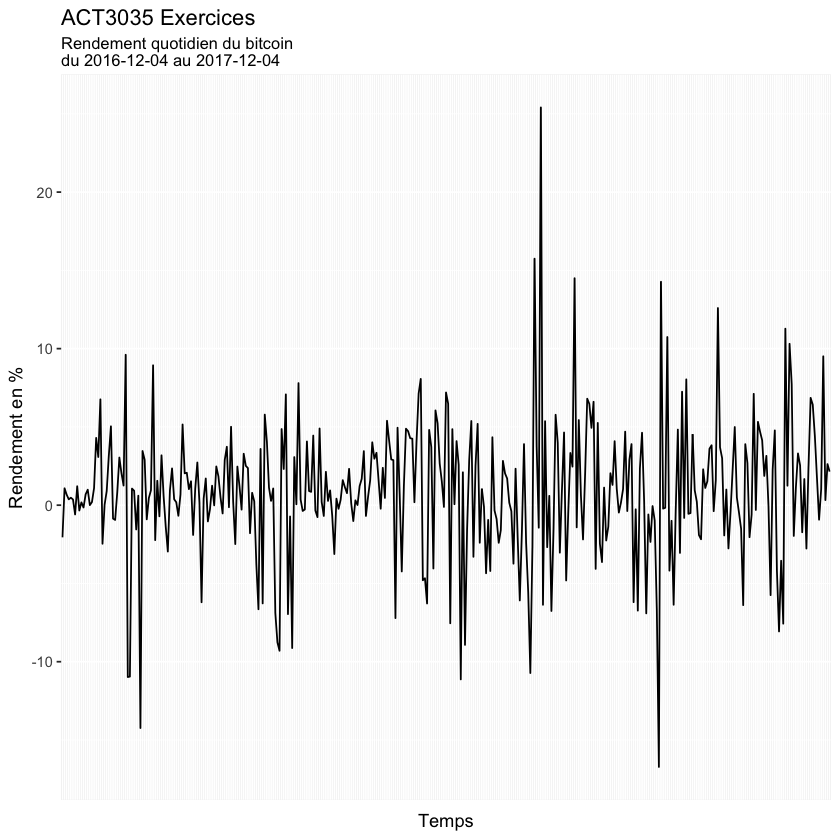

In [131]:
ggplot(bitCoin_2, aes(x=bitCoin_2$Date, group=1)) + 
  geom_line(aes(y=bitCoin_2$rate_return*100)) + 
  labs(title="ACT3035 Exercices", 
       subtitle="Rendement quotidien du bitcoin \ndu 2016-12-04 au 2017-12-04",
       y="Rendement en %")+ xlab("Temps")+
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank())

# Q7
Faites un graphique sur la corrélation entre les prix d'action venant des données [suivantes](https://raw.githubusercontent.com/nmeraihi/data/master/stocks_correlation.csv)

In [134]:
library(ggcorrplot)

In [135]:
df_app <-read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/stocks_correlation.csv", header = T)[ ,2:9]
mat_corr<-cor(df_app)

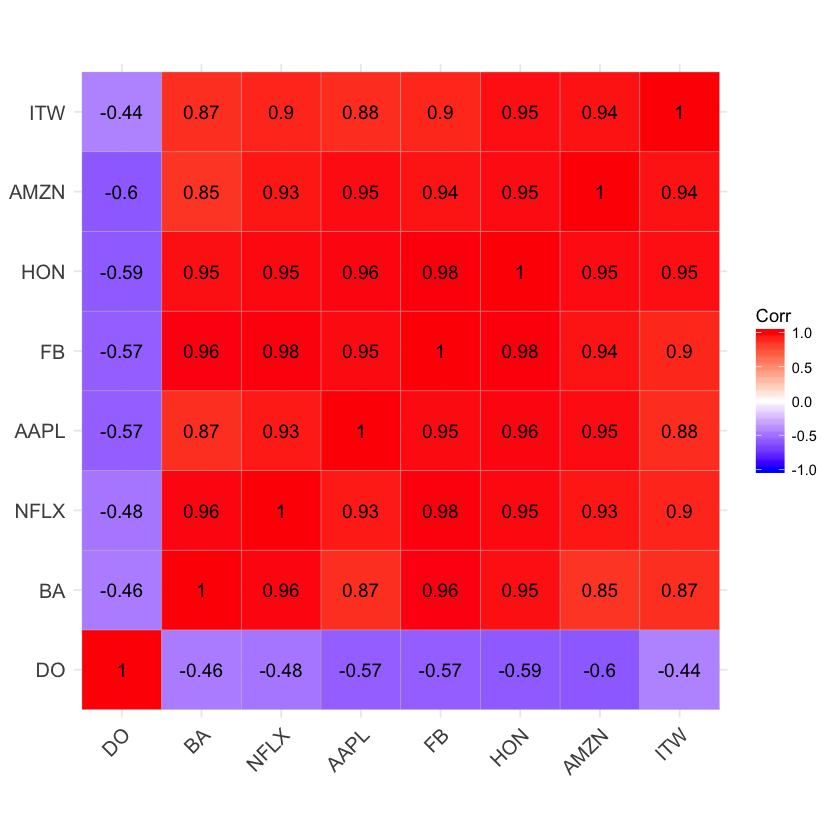

In [136]:
ggcorrplot(mat_corr, hc.order = TRUE,
   lab = TRUE)